# **House Price Prediction using Supervised Machine Learning**

The objective of this project is to build a supervised machine learning model to predict house prices based on various housing-related features. The project covers data understanding, exploratory data analysis, model training, evaluation, and comparison.

This project focuses on understanding how different regression models behave on structured housing data.

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [42]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create DataFrame
df = housing.frame

# Display first 5 rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
df.shape


(20640, 9)

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [45]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [46]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


**Target Variable:**
The target variable is MedHouseVal, which represents the median house value.

**Features:**
The remaining columns represent factors such as median income, house age, number of rooms, population, and location-related information that influence house prices.

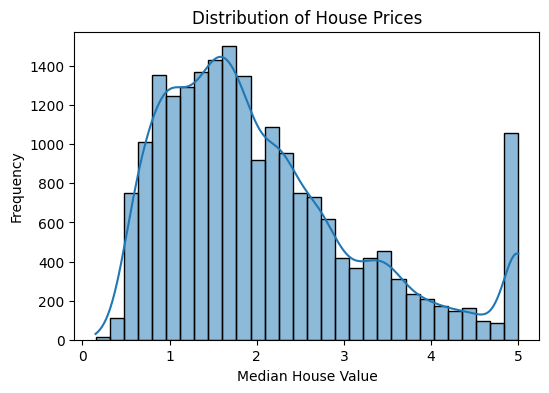

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [48]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X.head(), y.head()


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

In [49]:
X.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [50]:
X.nunique()


,0
MedInc,12928
HouseAge,52
AveRooms,19392
AveBedrms,14233
Population,3888
AveOccup,18841
Latitude,862
Longitude,844


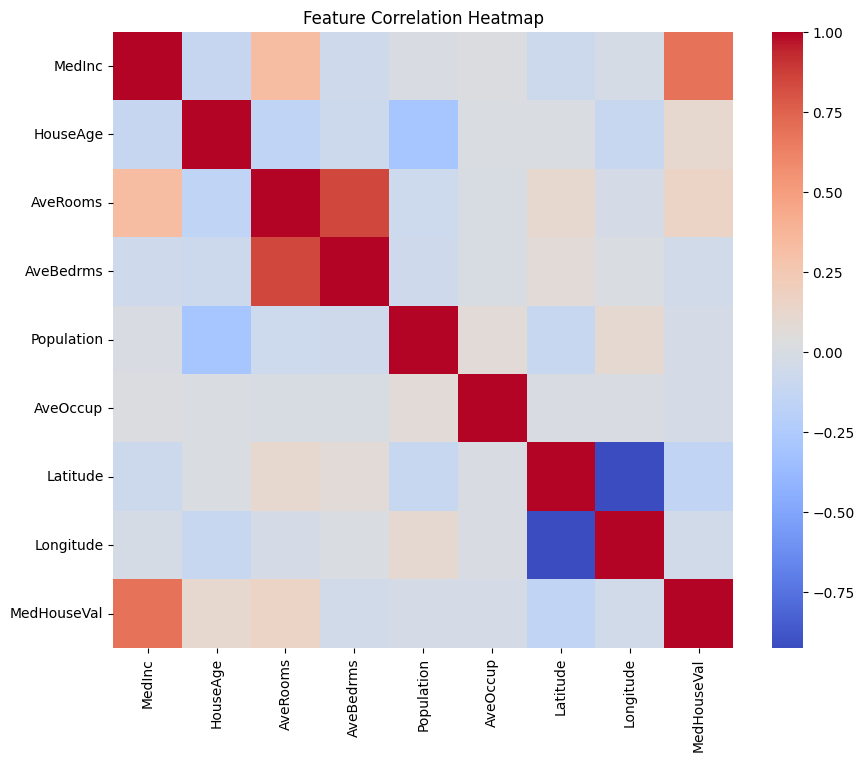

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### EDA Insight:
Median Income shows the strongest correlation with house price, indicating it is a key predictive feature. Some features show weak linear correlation, motivating the use of non-linear models.

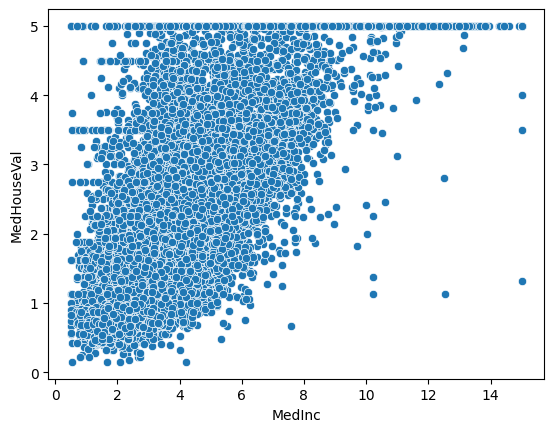

In [52]:
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.show()


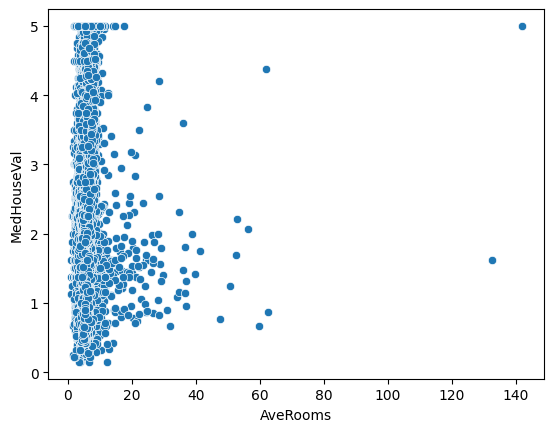

In [53]:
sns.scatterplot(x=df['AveRooms'], y=df['MedHouseVal'])
plt.show()




* Median income is strongly correlated with house prices

* Some features show non-linear relationships with the target

* Feature values vary widely, suggesting the need for preprocessing




In [54]:
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [55]:
df.duplicated().sum()


np.int64(0)

#### 1. Scaling rationale
Some models like Linear Regression are sensitive to feature scale, while tree-based models such as Decision Trees and Random Forests are not. I will apply scaling selectively during model training where required.


#### 2. Baseline justification
This baseline helps measure how much improvement more complex models provide.

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


For Decision Tree and Random Forest models, I used the original unscaled features since these models are not affected by feature scale.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [59]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [60]:
y_pred_lr = lr_model.predict(X_test_scaled)


In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(0.7455813830127763), 0.575787706032451)

RMSE was calculated by taking the square root of Mean Squared Error to maintain consistency across different library versions and ensure interpretability.

* Linear Regression provides a reasonable baseline performance

* The model assumes a linear relationship between features and target

* Performance is limited due to non-linear patterns in the data

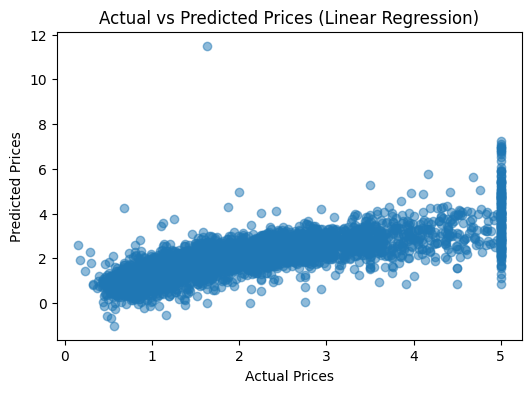

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


In [63]:
from sklearn.tree import DecisionTreeRegressor


In [64]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [65]:
y_pred_dt = dt_model.predict(X_test)


In [66]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

rmse_dt, r2_dt


(np.float64(0.7037294974840077), 0.622075845135081)

* Decision Tree captures non-linear relationships better than Linear Regression

* The model shows improved performance compared to the baseline

* However, unrestricted trees can easily overfit the training data

Decision Trees can overfit if they grow too deep, as they may learn noise instead of general patterns. This motivates the use of ensemble methods like Random Forest.

In [67]:
from sklearn.ensemble import RandomForestRegressor


In [68]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [69]:
y_pred_rf = rf_model.predict(X_test)


In [70]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(np.float64(0.5053399773665033), 0.8051230593157366)

In [71]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf],
    "R2 Score": [r2_lr, r2_dt, r2_rf]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,0.745581,0.575788
1,Decision Tree,0.703729,0.622076
2,Random Forest,0.505340,0.805123


* Linear Regression served as a simple baseline

* Decision Tree improved performance by modeling non-linear patterns

* Random Forest provided the best performance by reducing overfitting through ensembling

# Conclusion

* Built an end-to-end supervised ML pipeline for house price prediction

* Compared linear and tree-based models to understand bias–variance tradeoff

* Random Forest achieved the best performance due to its ability to model non-linear relationships and reduce overfitting

# Future Improvements

* Hyperparameter tuning for Random Forest

* Feature engineering and outlier handling

* rying gradient boosting models with more data

In [72]:
%%writefile requirements.txt
numpy
pandas
matplotlib
seaborn
scikit-learn


Overwriting requirements.txt


In [76]:
%%writefile README.md
# House Price Prediction using Machine Learning

## Overview
This project focuses on building a supervised machine learning pipeline to predict house prices using structured housing data.

## Dataset
The project uses the California Housing dataset, which contains features such as median income, house age, number of rooms, population, and geographical information.

## Approach
- Data understanding and basic exploratory analysis
- Feature preprocessing
- Model training using Linear Regression
- Model comparison with Decision Tree and Random Forest
- Evaluation using RMSE and R² score

## Models Used
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

## Evaluation Metrics
- Root Mean Squared Error (RMSE)
- R² Score

## Conclusion
This project demonstrates how different regression models perform on structured housing data and highlights the importance of model selection.

## Tools
Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

## Author
Tarun Tripathi


Overwriting README.md


In [81]:
!ls -a


.  ..  .config	.gitignore  README.md  requirements.txt  sample_data


In [85]:
!git config --global user.name "Tarun Tripathi"
!git config --global user.email "taruntripathi7654@gmail.com"


In [86]:
!git commit -m "Initial commit: House price prediction ML project"


[master (root-commit) 96770db] Initial commit: House price prediction ML project
 18 files changed, 996 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.12.11/14.33.40.102128.log
 create mode 100644 .config/logs/2025.12.11/14.34.12.303029.log
 create mode 100644 .config/logs/2025.12.11/14.34.22.298248.log
 create mode 100644 .config/logs/2025.12.11/14.34.28.289959.log
 create mode 100644 .config/logs/2025.12.11/14.34.38.212031.log
 create mode 100644 .config/logs/2025.12.11/14.34.39.029902.log
 create mode 100644 .gitig

In [88]:
!git rm -r --cached .config


rm '.config/.last_opt_in_prompt.yaml'
rm '.config/.last_survey_prompt.yaml'
rm '.config/.last_update_check.json'
rm '.config/active_config'
rm '.config/config_sentinel'
rm '.config/configurations/config_default'
rm '.config/default_configs.db'
rm '.config/gce'
rm '.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db'
rm '.config/logs/2025.12.11/14.33.40.102128.log'
rm '.config/logs/2025.12.11/14.34.12.303029.log'
rm '.config/logs/2025.12.11/14.34.22.298248.log'
rm '.config/logs/2025.12.11/14.34.28.289959.log'
rm '.config/logs/2025.12.11/14.34.38.212031.log'
rm '.config/logs/2025.12.11/14.34.39.029902.log'


In [91]:
!git remote -v


In [95]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [96]:
!git remote remove origin


In [98]:
!git push -u origin main


Enumerating objects: 27, done.
Counting objects: 100% (27/27), done.
Delta compression using up to 2 threads
Compressing objects: 100% (19/19), done.
Writing objects: 100% (27/27), 8.80 KiB | 2.20 MiB/s, done.
Total 27 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), done.
To https://github.com/tarun-tripathi/house-price-prediction-ml.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [99]:
!git remote remove origin
!git remote add origin https://github.com/tarun-tripathi/house-price-prediction-ml.git
